In [18]:
# Import for data manipulation
import pandas as pd
import numpy as np

# Import for data viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from sklearn.model_selection import train_test_split

#ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Import for Hypothesis Testing
import scipy.stats as stats

# Import for acquisition
import os

# Add for setting to see all rows and columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Import to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-dark-palette')
plt.rc('font', size=16)

In [2]:
#Getting the data from kaggle https://www.kaggle.com/datasets/bobbyscience/league-of-legends-soloq-ranked-games
df = pd.read_csv('lol_ranked_games.csv')

In [3]:
#check for nulls
#Since the data is clean and created columns we needed so there wont be a prep functions
#But still has to split data for explore
#Our target is haswon because we are which feautres contribute to win a match
df.isna().sum().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242572 entries, 0 to 242571
Data columns (total 59 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gameId                   242572 non-null  int64  
 1   gameDuration             242572 non-null  int64  
 2   hasWon                   242572 non-null  int64  
 3   frame                    242572 non-null  int64  
 4   goldDiff                 242572 non-null  int64  
 5   expDiff                  242572 non-null  int64  
 6   champLevelDiff           242572 non-null  float64
 7   isFirstTower             242572 non-null  int64  
 8   isFirstBlood             242572 non-null  int64  
 9   killedFireDrake          242572 non-null  int64  
 10  killedWaterDrake         242572 non-null  int64  
 11  killedAirDrake           242572 non-null  int64  
 12  killedEarthDrake         242572 non-null  int64  
 13  killedElderDrake         242572 non-null  int64  
 14  lost

In [5]:
def split_data(df,target):
    '''
    This function takes in a dataframe and a target variable and split the data into 3: train, validate and test
    Establish train+validate set 80% of original data and then repeat the process 
    Split train+validate  into train, validate separately 
    '''
    train_validate, test = train_test_split(df, 
                                            test_size=.2, 
                                            random_state=123, 
                                            stratify=df[target])

    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate[target])
    return train, validate, test

In [6]:
train, validate, test = split_data(df, 'hasWon')

In [7]:
train.shape[0], validate.shape[0], test.shape[0]

(135839, 58218, 48515)

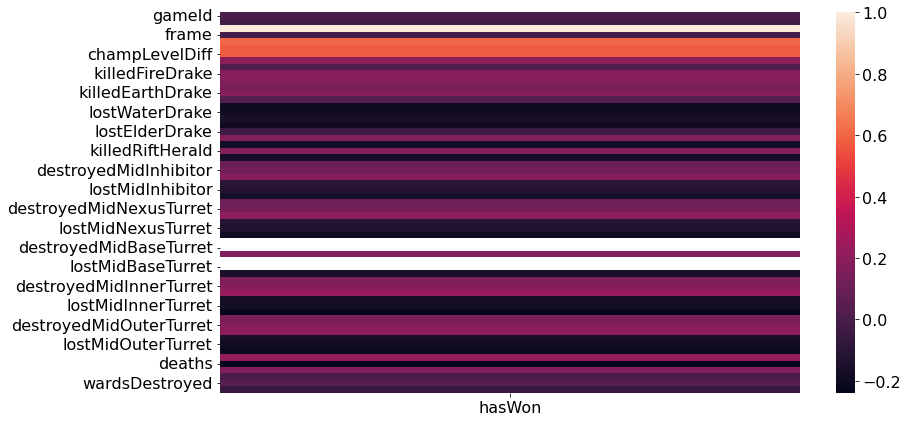

In [8]:
winning_correlation = train.corr()['hasWon'].to_frame()
sns.heatmap(winning_correlation)
plt.show()

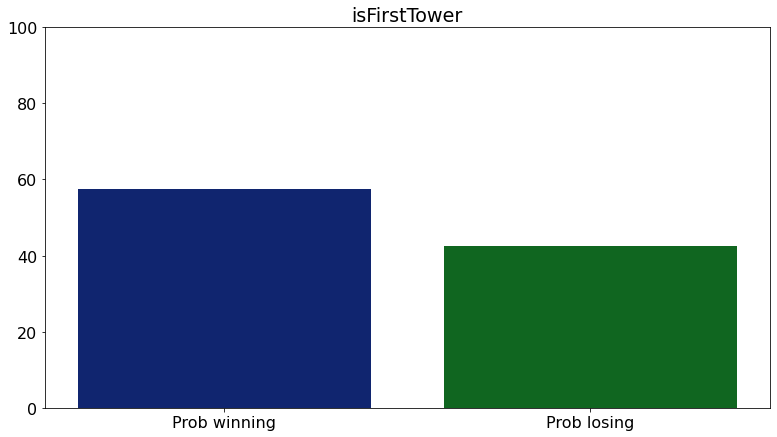

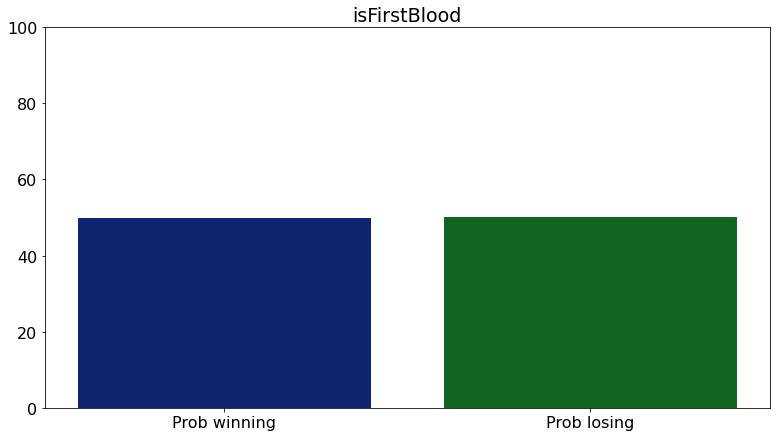

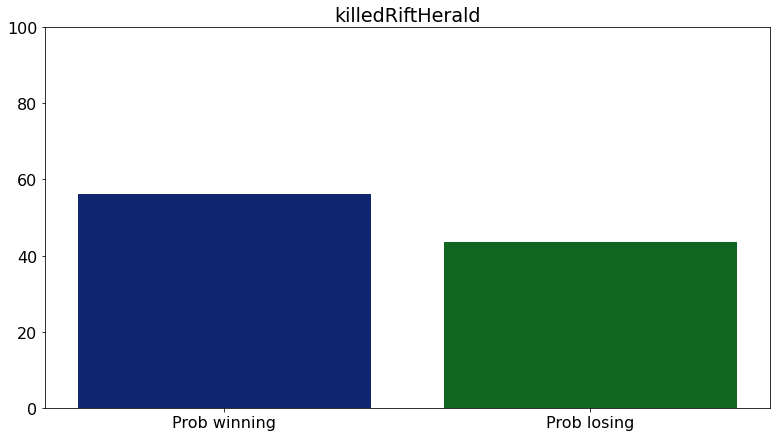

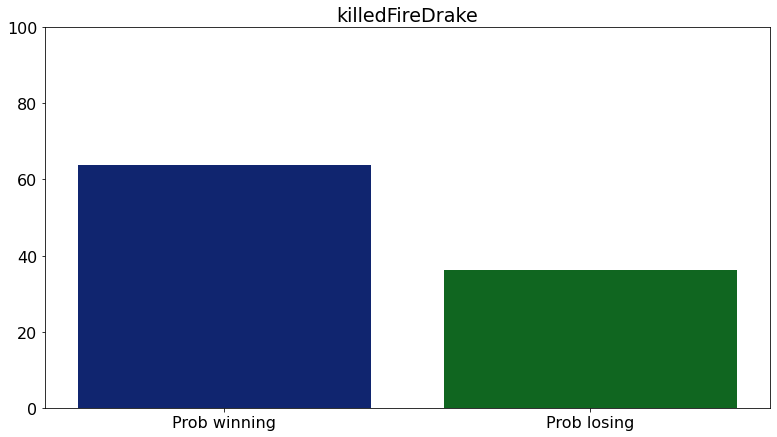

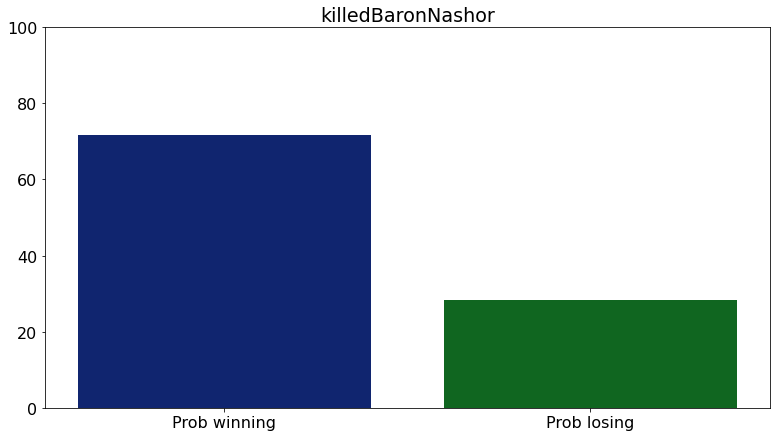

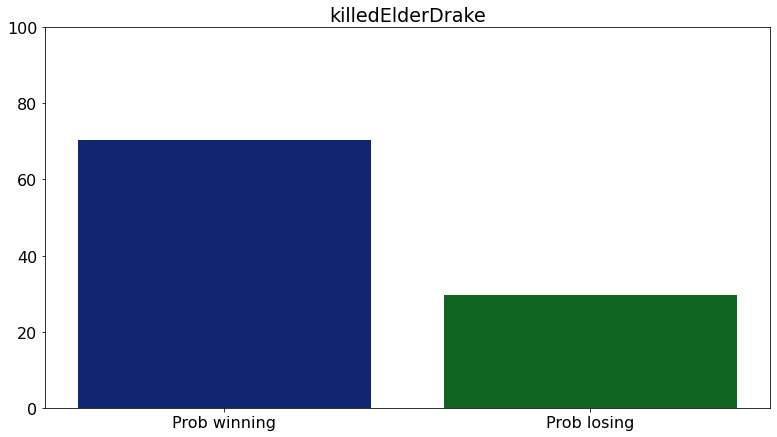

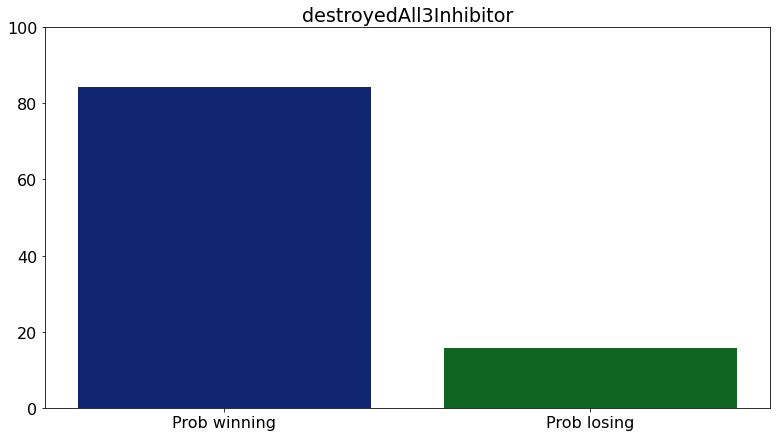

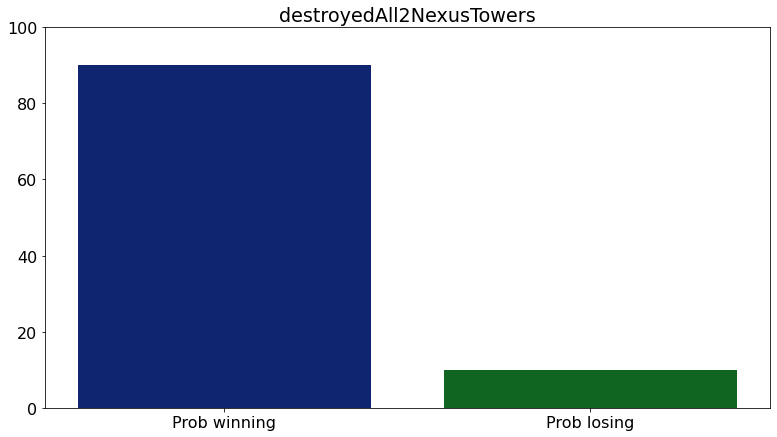

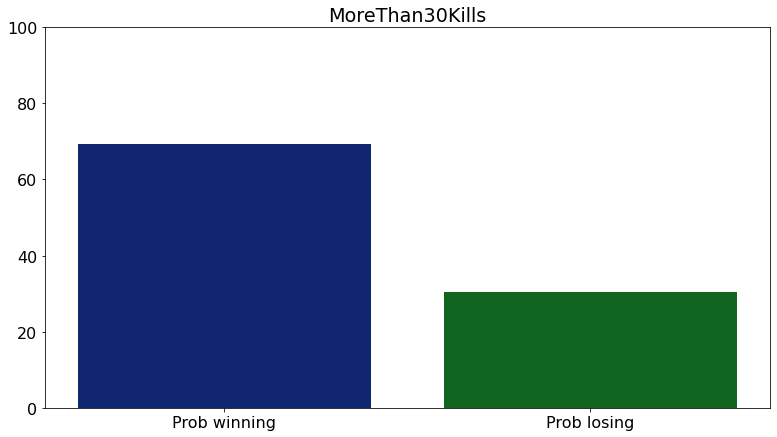

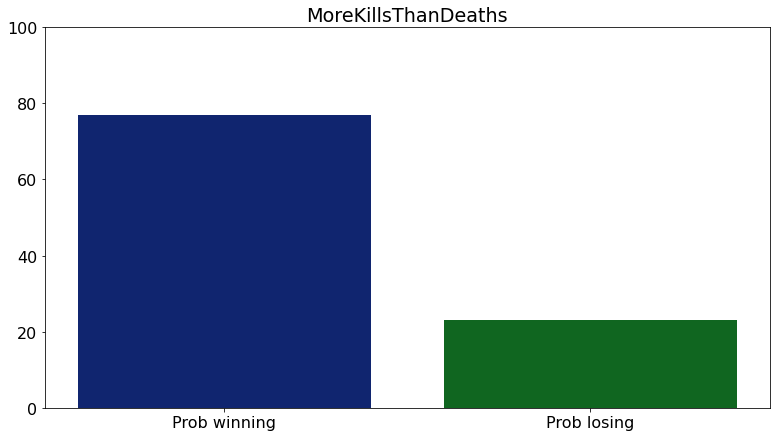

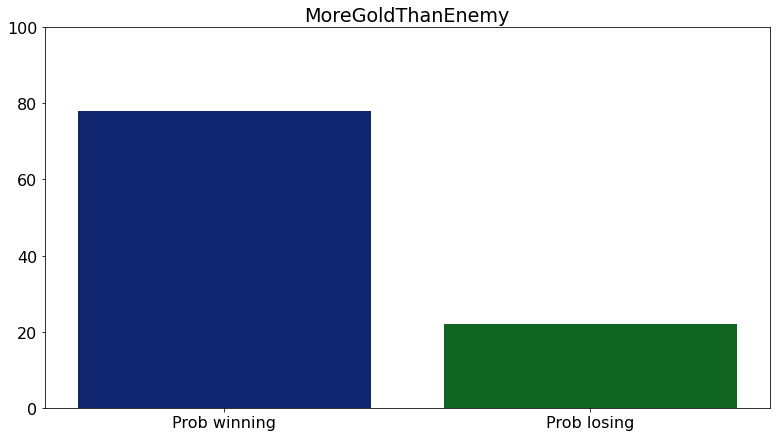

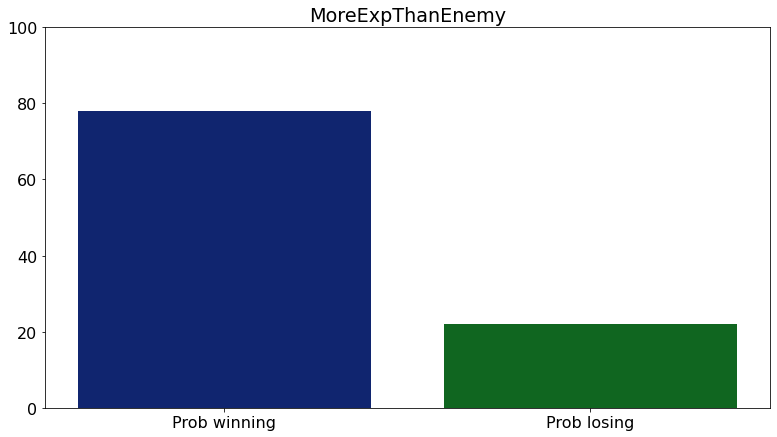

In [9]:
#We obtain the number of rows that win and get the first towers  and we divide it by the total of rows to get the probability
attributes = ['isFirstTower', 'isFirstBlood','killedRiftHerald', 'killedFireDrake', 'killedBaronNashor', 'killedElderDrake']
for atribute in attributes:
    Prob_winning = sum(np.logical_and(train[atribute] == 1, train['hasWon'] == 1)) / sum(train[atribute] == 1) * 100
    ax = sns.barplot(['Prob winning', 'Prob losing'], [Prob_winning, 100- Prob_winning])
    ax.set_title(atribute)
    ax.set_ylim([0,100])
    plt.plot()
    plt.show()

#Calculate probability of winning if you have destroyed all the enemy inhibitors
df_aux = pd.DataFrame(train, columns = ['destroyedTopInhibitor', 'destroyedMidInhibitor','destroyedBotInhibitor'])
df_aux = df_aux.sum(axis=1)
wins_with_all_inhibitors = sum(np.logical_and(df_aux == 3, train['hasWon'] == 1))
all_games_3_inhibis = sum(df_aux == 3)
Prob_winning = wins_with_all_inhibitors / all_games_3_inhibis * 100
ax = sns.barplot(['Prob winning', 'Prob losing'], [Prob_winning, 100- Prob_winning])
ax.set_title('destroyedAll3Inhibitor')
ax.set_ylim([0,100])
plt.plot()
plt.show()

#Calculate probability of winning if you have destroyed all the enemy nexus towers
df_aux = pd.DataFrame(train, columns = ['destroyedTopNexusTurret', 'destroyedMidNexusTurret','destroyedBotNexusTurret'])
df_aux = df_aux.sum(axis=1)
wins_with_all_nexus_towers = sum(np.logical_and(df_aux == 3, train['hasWon'] == 1))
all_games_2_nexus_towers = sum(df_aux == 3)
Prob_winning = wins_with_all_nexus_towers / all_games_2_nexus_towers * 100
ax = sns.barplot(['Prob winning', 'Prob losing'], [Prob_winning, 100- Prob_winning])
ax.set_title('destroyedAll2NexusTowers')
ax.set_ylim([0,100])
plt.plot()
plt.show()

#Calculate probability of winning if you have more than 30 kills
Prob_winning = sum(np.logical_and(train['kills'] > 30, train['hasWon'] == 1)) / sum(train['kills'] > 30) * 100
ax = sns.barplot(['Prob winning', 'Prob losing'], [Prob_winning, 100- Prob_winning])
ax.set_title('MoreThan30Kills')
ax.set_ylim([0,100])
plt.plot()
plt.show()

#Calculate probability of winning if you have more kills than deaths
Prob_winning = sum(np.logical_and(train['kills'] > train['deaths'], train['hasWon'] == 1)) / sum(train['kills'] > train['deaths']) * 100
ax = sns.barplot(['Prob winning', 'Prob losing'], [Prob_winning, 100- Prob_winning])
ax.set_title('MoreKillsThanDeaths')
ax.set_ylim([0,100])
plt.plot()
plt.show()

#Calculate probability of winning if you have more gold than the enemy
Prob_winning = sum(np.logical_and(train['goldDiff'] > 0, train['hasWon'] == 1)) / sum(train['goldDiff'] > 0) * 100
ax = sns.barplot(['Prob winning', 'Prob losing'], [Prob_winning, 100- Prob_winning])
ax.set_title('MoreGoldThanEnemy')
ax.set_ylim([0,100])
plt.plot()
plt.show()

#Calculate probability of winning if you have more exp than the enemy
Prob_winning = sum(np.logical_and(train['expDiff'] > 0, train['hasWon'] == 1)) / sum(train['expDiff'] > 0) * 100
ax = sns.barplot(['Prob winning', 'Prob losing'], [Prob_winning, 100- Prob_winning])
ax.set_title('MoreExpThanEnemy')
ax.set_ylim([0,100])
plt.plot()
plt.show()

In [14]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [15]:
y = train['hasWon']
X = train.loc[:, train.columns != 'hasWon']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

Accuracy KNN : 0.6907 

Accuracy Decission trees : 0.77289 

Accuracy Random Forest : 0.797 



In [19]:
scores = cross_val_score(knn, X, y, cv=5) 
print('Cross-val Knn:',scores)
print('Cross-val Knn mean:',scores.mean())

scores = cross_val_score(tree, X, y, cv=5)
print('Cross-val Decision Tree:',scores)
print('Cross-val Decision Tree mean:',scores.mean())

scores = cross_val_score(rforest, X, y, cv=5)
print('Cross-val Random forest:',scores)
print('Cross-val Random forest mean:',scores.mean())

Cross-val Knn: [0.69276355 0.6838192  0.6962235  0.69040783 0.69231052]
Cross-val Knn mean: 0.6911049198360115
Cross-val Decision Tree: [0.77145907 0.76939782 0.77031802 0.76829358 0.76497221]
Cross-val Decision Tree mean: 0.7688881402547771
Cross-val Random forest: [0.79604682 0.79578916 0.80002208 0.79744552 0.79659145]
Cross-val Random forest mean: 0.7971790090654658
